In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import xgboost as xgb

In [ ]:
df_teste = pd.read_csv('/content/test_Sleep_health_and_lifestyle_dataset.csv')
df_treino = pd.read_csv('/content/train_Sleep_health_and_lifestyle_dataset.csv')
df_validacao = pd.read_csv('/content/val_Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
#Definindo os parâmetros de teste do modelo

param_grid = {
    'learning_rate': [0.3, 0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.4, 0.6, 0.8, 1.0]
}

In [ ]:
#Separando X e y dos modelos

X_treino = df_treino.drop(columns=['Quality of Sleep'])
y_treino = df_treino['Quality of Sleep']

#Instanciando o modelo (com a métrica MSE)
modelo_xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

#Busca em grade + validação cruzada
treino = GridSearchCV(modelo_xgb, param_grid, cv=5, n_jobs=-1)
treino.fit(X_treino, y_treino)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.1, 0.05, 0.01],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 200, 300],
                         'subsample': [0.4, 0.6, 0.8, 1.0]})

In [ ]:
print(f'''Melhores parâmetros: {treino.best_params_}
Nota: {treino.best_score_}''')

Melhores parâmetros: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Nota: 0.9937429428100586


In [ ]:
X_validacao = df_validacao.drop(columns=['Quality of Sleep'])
y_validacao = df_validacao['Quality of Sleep']

#Mesma coisa com os dados da validação
treino.score(X_validacao, y_validacao)

0.9991746544837952

In [ ]:
X_teste = df_teste.drop(columns=['Quality of Sleep'])
y_teste = df_teste['Quality of Sleep']

#O modelo responde e compara, retornando o r2_SCORE
treino.score(X_teste, y_teste)

0.9971936345100403

In [ ]:
melhor_modelo = treino.best_estimator_

In [ ]:
y_preverv = melhor_modelo.predict(X_validacao)

MAEv = mean_absolute_error(y_validacao, y_preverv)
RMSEv = root_mean_squared_error(y_validacao, y_preverv)

print(f'''MAE: {MAEv}
RMSE: {RMSEv}''')

MAE: 0.009306843392550945
RMSE: 0.03515148162841797


In [ ]:
#Predict da melhor versão do modelo, MAE

melhor_modelo = treino.best_estimator_
y_prever = melhor_modelo.predict(X_teste)

#Métricas
MAE = mean_absolute_error(y_teste, y_prever)
RMSE = root_mean_squared_error(y_teste, y_prever)

print(f'''MAE: {MAE}
RMSE: {RMSE}''')

MAE: 0.016159476712346077
RMSE: 0.06334859132766724


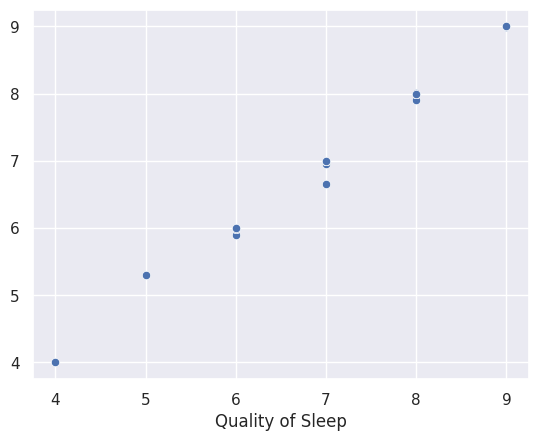

In [ ]:
sns.set_theme(style='darkgrid')
sns.scatterplot(x=y_teste, y=y_prever)
plt.show()

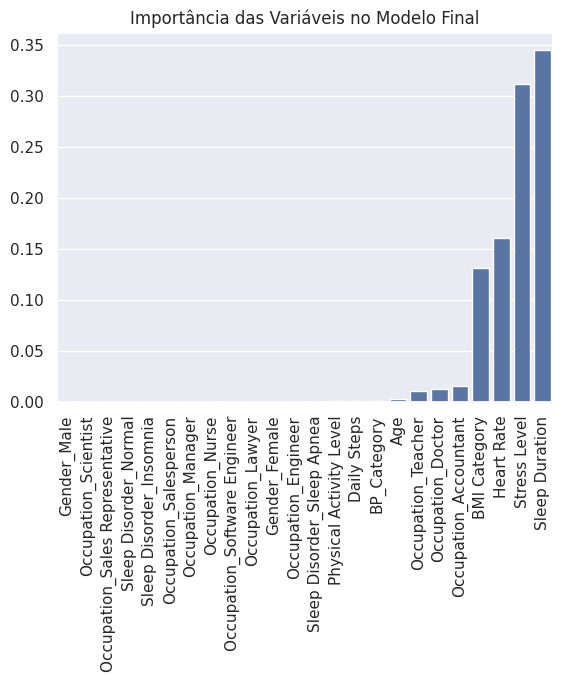

In [ ]:
grau_importancia = pd.Series(melhor_modelo.feature_importances_, index=X_teste.columns)
grau_importancia = grau_importancia.sort_values(ascending=True)
plt.xticks(rotation=90)
plt.title("Importância das Variáveis no Modelo Final")
sns.barplot(grau_importancia)
plt.show()

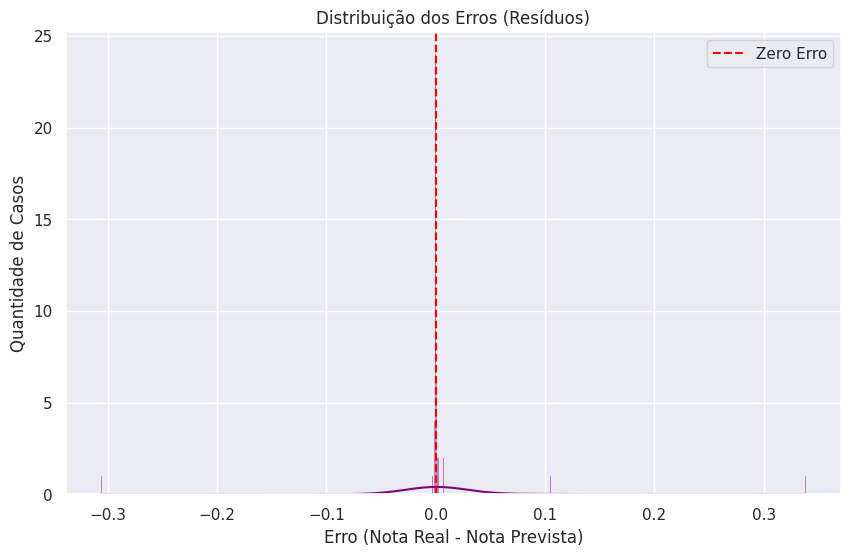

In [ ]:
# 1. Calcular os resíduos (a diferença entre o gabarito e o que o modelo chutou)
residuos = y_teste - y_prever

# 2. Construir o Histograma
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--', label='Zero Erro')

plt.title('Distribuição dos Erros (Resíduos)')
plt.xlabel('Erro (Nota Real - Nota Prevista)')
plt.ylabel('Quantidade de Casos')
plt.legend()
plt.show()

In [ ]:
#Salvando o modelo final para o Streamlit
joblib.dump(melhor_modelo, 'modelo_final.joblib')
joblib.dump(X_treino.columns, 'colunas.joblib')

['colunas.joblib']